In [134]:
from sklearn.linear_model import LinearRegression
from sklearn.decomposition import FastICA
from pandas import DataFrame, Series
import matplotlib.pylab as plt
import pandas as pd
import numpy as np
import seaborn as sns
import datetime
import io

%matplotlib inline
np.set_printoptions(precision=3 , suppress= True)

In [57]:
#importing the file and defining the columns I am going to work with:
filePath = './kope.txt'
columnsName = ['YYMMMDD', '_north(m)', 'sig_n(m)']
site = pd.read_csv(filePath, usecols = columnsName, delimiter = '\s+')
site

,YYMMMDD,_north(m),sig_n(m)
0,06JAN01,0.602461,0.000911
1,06JAN02,0.601925,0.001427
2,06JAN03,0.604777,0.001051
3,06JAN04,0.607665,0.000918
4,06JAN05,0.603519,0.000918
...,...,...,...
5967,22DEC27,0.902084,0.000872
5968,22DEC28,0.903768,0.000912
5969,22DEC29,0.902280,0.000865
5970,22DEC30,0.900240,0.000860


In [58]:
#changing the dtype of 'YYMMMDD':
site['YYMMMDD'] = pd.to_datetime(site['YYMMMDD'], format='%y%b%d')
site['YYMMMDD']

0      2006-01-01
1      2006-01-02
2      2006-01-03
3      2006-01-04
4      2006-01-05
          ...    
5967   2022-12-27
5968   2022-12-28
5969   2022-12-29
5970   2022-12-30
5971   2022-12-31
Name: YYMMMDD, Length: 5972, dtype: datetime64[ns]

In [59]:
#setting 'YYMMMDD' as index:
site.set_index('YYMMMDD', inplace = True)
site

,_north(m),sig_n(m)
YYMMMDD,,
2006-01-01,0.602461,0.000911
2006-01-02,0.601925,0.001427
2006-01-03,0.604777,0.001051
2006-01-04,0.607665,0.000918
2006-01-05,0.603519,0.000918
...,...,...
2022-12-27,0.902084,0.000872
2022-12-28,0.903768,0.000912
2022-12-29,0.902280,0.000865


In [74]:
#creating a new instance with a new period for the time series:
sitePeriodTime = site.loc['2006-01-01':'2022-12-31']
sitePeriodTime

,_north(m),sig_n(m)
YYMMMDD,,
2006-01-01,0.602461,0.000911
2006-01-02,0.601925,0.001427
2006-01-03,0.604777,0.001051
2006-01-04,0.607665,0.000918
2006-01-05,0.603519,0.000918
...,...,...
2022-12-27,0.902084,0.000872
2022-12-28,0.903768,0.000912
2022-12-29,0.902280,0.000865


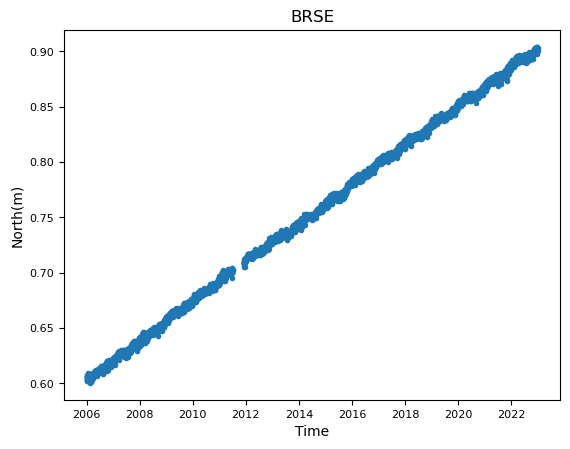

In [75]:
#checking the if the ts is stationarity for east:
plt.plot(sitePeriodTime.index, sitePeriodTime['_north(m)'], '.')
plt.title('BRSE')
plt.xlabel('Time')
plt.xticks(fontsize=8)
plt.ylabel('North(m)')
plt.yticks(fontsize=8)
plt.show()

In [76]:
from statsmodels.tsa.stattools import adfuller
def test_stationarity(timeseries):
    
    #Determing rolling statistics
    rolmean = pd.Series(timeseries).rolling(window=12).mean()
    rolstd = pd.Series(timeseries).rolling(window=12).std()

    #Plot rolling statistics:
    orig = plt.plot(timeseries, color='blue',label='Original')
    mean = plt.plot(rolmean, color='red', label='Rolling Mean')
    std = plt.plot(rolstd, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show(block=False)
    
    #Perform Dickey-Fuller test:
    print ('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print (dfoutput)

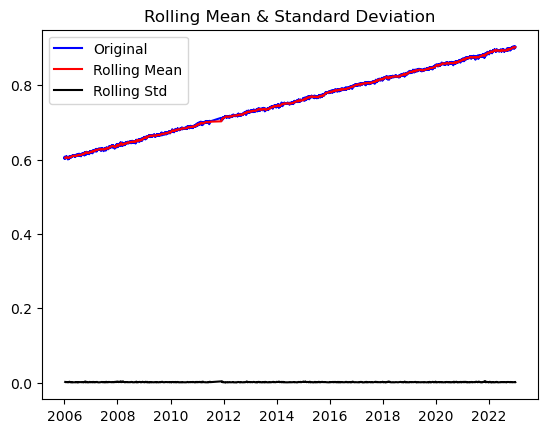

Results of Dickey-Fuller Test:
Test Statistic                   -0.419096
p-value                           0.906861
#Lags Used                       20.000000
Number of Observations Used    5951.000000
Critical Value (1%)              -3.431449
Critical Value (5%)              -2.862026
Critical Value (10%)             -2.567029
dtype: float64


In [88]:
test_stationarity(sitePeriodTime['_north(m)'])

In [89]:
tsLogN = np.log1p(sitePeriodTime['_north(m)'])
tsLogN

YYMMMDD
2006-01-01    0.471541
2006-01-02    0.471206
2006-01-03    0.472985
2006-01-04    0.474783
2006-01-05    0.472201
                ...   
2022-12-27    0.642950
2022-12-28    0.643835
2022-12-29    0.643053
2022-12-30    0.641980
2022-12-31    0.643418
Name: _north(m), Length: 5972, dtype: float64

In [90]:
tsLogN_df = pd.DataFrame(tsLogN, index=tsLogN.index)
tsLogN_df

,_north(m)
YYMMMDD,
2006-01-01,0.471541
2006-01-02,0.471206
2006-01-03,0.472985
2006-01-04,0.474783
2006-01-05,0.472201
...,...
2022-12-27,0.642950
2022-12-28,0.643835
2022-12-29,0.643053


In [91]:
tsLogDiffN = tsLogN - tsLogN.shift()
tsLogDiffN

YYMMMDD
2006-01-01         NaN
2006-01-02   -0.000335
2006-01-03    0.001779
2006-01-04    0.001798
2006-01-05   -0.002582
                ...   
2022-12-27   -0.000173
2022-12-28    0.000885
2022-12-29   -0.000782
2022-12-30   -0.001073
2022-12-31    0.001438
Name: _north(m), Length: 5972, dtype: float64

In [92]:
tsLogDiffN.dropna(inplace = True)
tsLogDiffN

YYMMMDD
2006-01-02   -0.000335
2006-01-03    0.001779
2006-01-04    0.001798
2006-01-05   -0.002582
2006-01-06    0.000435
                ...   
2022-12-27   -0.000173
2022-12-28    0.000885
2022-12-29   -0.000782
2022-12-30   -0.001073
2022-12-31    0.001438
Name: _north(m), Length: 5971, dtype: float64

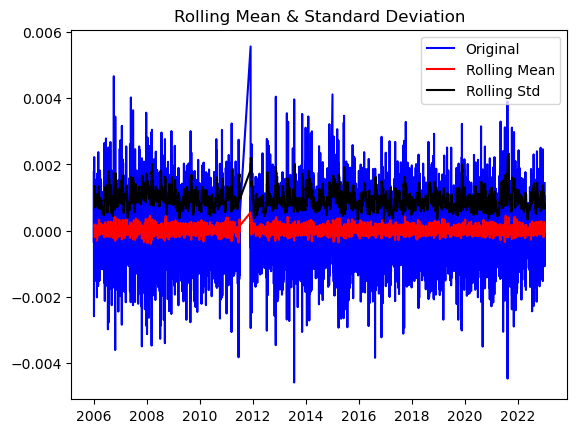

Results of Dickey-Fuller Test:
Test Statistic                  -25.471640
p-value                           0.000000
#Lags Used                       19.000000
Number of Observations Used    5951.000000
Critical Value (1%)              -3.431449
Critical Value (5%)              -2.862026
Critical Value (10%)             -2.567029
dtype: float64


In [93]:
test_stationarity(tsLogDiffN)

In [94]:
tsLogDiffN_df = pd.DataFrame(tsLogDiffN, index=tsLogDiffN.index)
tsLogDiffN_df

,_north(m)
YYMMMDD,
2006-01-02,-0.000335
2006-01-03,0.001779
2006-01-04,0.001798
2006-01-05,-0.002582
2006-01-06,0.000435
...,...
2022-12-27,-0.000173
2022-12-28,0.000885
2022-12-29,-0.000782


In [95]:
limiarZ = 1.0
tsLogDiffN_noOut = tsLogDiffN_df[(np.abs(tsLogDiffN_df-tsLogDiffN_df.mean()) 
                                              < limiarZ*tsLogDiffN_df.std())]
tsLogDiffN_noOut#removing the rows with missing values
tsLogDiffN_noOut.dropna(inplace=True)

In [151]:
#removing the rows with missing values
tsLogDiffN_noOut.dropna(inplace=True)
tsLogDiffN_noOut

,_north(m)
YYMMMDD,
2006-01-02,-3.345415e-04
2006-01-06,4.351979e-04
2006-01-07,-5.474573e-04
2006-01-10,1.108732e-04
2006-01-11,-6.228490e-07
...,...
2022-12-24,2.944144e-05
2022-12-26,-8.911018e-04
2022-12-27,-1.734789e-04


from statsmodels.tsa.seasonal import seasonal_decompose

#data frame before checking the outliers
decompositionN = seasonal_decompose(tsLogDiffN_df, period=365)
trendN = decompositionN.trend
seasonalN = decompositionN.seasonal
residualN = decompositionN.resid

plt.subplot(411) 
plt.plot(tsLogDiffN_df, label='Original') 
plt.legend(loc='best') 
plt.subplot(412) 
plt.plot(trendN, label='T') 
plt.legend(loc='best') 
plt.subplot(413) 
plt.plot(seasonalN,label='S') 
plt.legend(loc='best') 
plt.subplot(414) 
plt.plot(residualN, label='R') 
plt.legend(loc='best') 
plt.tight_layout()

#making a copy of the data 
tsLogDiffN_noOut2= tsLogDiffN_noOut

#replacing the missing values for the mean
tsLogDiffN_noOut2.fillna(tsLogDiffN_noOut2.mean(), inplace = True)

plt.subplot(411) 
plt.plot(tsLogDiffN_noOut, label='rem')
plt.xticks(fontsize=8)
plt.yticks(fontsize=8)
plt.legend(loc='best') 
plt.subplot(412) 
plt.plot(tsLogDiffN_noOut2, label='rep') 
plt.xticks(fontsize=8)
plt.yticks(fontsize=8)
plt.legend(loc='best') 

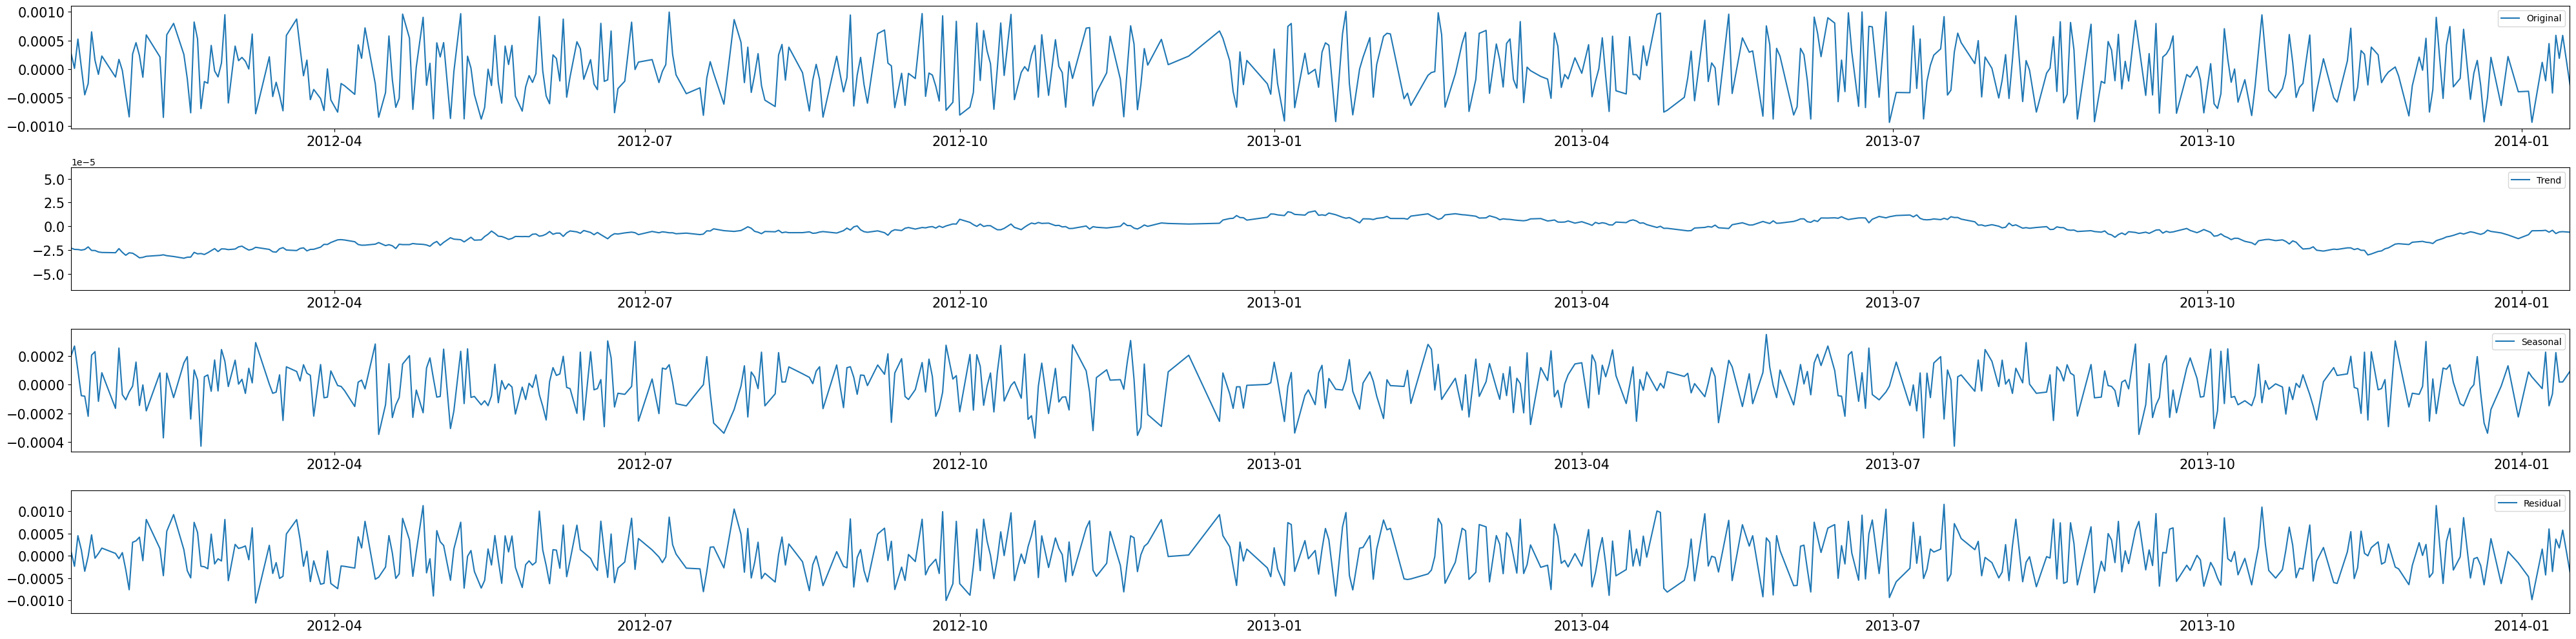

In [154]:
#data frame with outliers removed 
decompositionN_outRem = seasonal_decompose(tsLogDiffN_noOut, period=365)
trendN_outRem = decompositionN_outRem.trend
seasonalN_outRem = decompositionN_outRem.seasonal
residualN_outRem = decompositionN_outRem.resid

fig=plt.figure(figsize=(40,10))

plt.subplot(411) 
plt.plot(tsLogDiffN_noOut, label='Original') 
plt.legend(loc='best')
plt.xticks(fontsize=15)
plt.xlim(pd.Timestamp('2012-01-15'), pd.Timestamp('2014-01-15'))
plt.yticks(fontsize=15)

plt.subplot(412) 
plt.plot(trendN_outRem, label='Trend') 
plt.legend(loc='best') 
plt.xticks(fontsize=15)
plt.xlim(pd.Timestamp('2012-01-15'), pd.Timestamp('2014-01-15'))
plt.yticks(fontsize=15)

plt.subplot(413) 
plt.plot(seasonalN_outRem,label='Seasonal') 
plt.legend(loc='best')
plt.xticks(fontsize=15)
plt.xlim(pd.Timestamp('2012-01-15'), pd.Timestamp('2014-01-15'))
plt.yticks(fontsize=15)

plt.subplot(414) 
plt.plot(residualN_outRem, label='Residual') 
plt.legend(loc='best') 
plt.xticks(fontsize=15)
plt.xlim(pd.Timestamp('2012-01-15'), pd.Timestamp('2014-01-15'))
plt.yticks(fontsize=15)

plt.tight_layout()

fl = 'kope_decomposition_north_1214.svg'
f = io.BytesIO()
plt.savefig(fl, format="svg")

#data frame with outliers replaced (1086 rows)
decompositionN_outRep = seasonal_decompose(tsLogDiffN_noOut2, period=365)
trendN_outRep = decompositionN_outRep.trend
seasonalN_outRep = decompositionN_outRep.seasonal
residualN_outRep = decompositionN_outRep.resid

plt.subplot(411) 
plt.plot(tsLogDiffN_noOut2, label='Original') 
plt.legend(loc='best') 
plt.subplot(412) 
plt.plot(trendN_outRep, label='T') 
plt.legend(loc='best') 
plt.subplot(413) 
plt.plot(seasonalN_outRep,label='S') 
plt.legend(loc='best') 
plt.subplot(414) 
plt.plot(residualN_outRep, label='R') 
plt.legend(loc='best') 
plt.tight_layout()

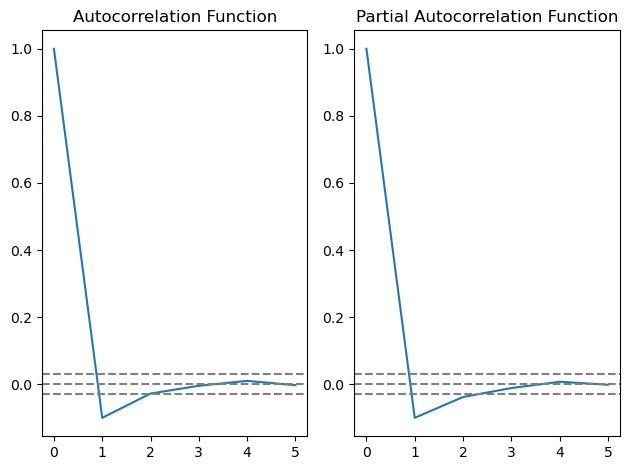

In [98]:
#ACF and PACF plots - rolling mean:
from statsmodels.tsa.stattools import acf, pacf

lag_acf = acf(tsLogDiffN_noOut, nlags=5)
lag_pacf = pacf(tsLogDiffN_noOut, nlags=5, method='ols')

#Plot ACF (q -> model MA): 
plt.subplot(121) 
plt.plot(lag_acf)
plt.axhline(y=0,linestyle='--',color='gray')
plt.axhline(y=-1.96/np.sqrt(len(tsLogDiffN_noOut)),linestyle='--',color='gray')
plt.axhline(y=1.96/np.sqrt(len(tsLogDiffN_noOut)),linestyle='--',color='gray')
plt.title('Autocorrelation Function')

#Plot PACF (p -> model AR): 
plt.subplot(122)
plt.plot(lag_pacf)
plt.axhline(y=0,linestyle='--',color='gray')
plt.axhline(y=-1.96/np.sqrt(len(tsLogDiffN_noOut)),linestyle='--',color='gray')
plt.axhline(y=1.96/np.sqrt(len(tsLogDiffN_noOut)),linestyle='--',color='gray') 
plt.title('Partial Autocorrelation Function') 
plt.tight_layout()

In [99]:
#converting the index to datetime
tsLogDiffN_df.index = pd.to_datetime(tsLogDiffN_df.index)
tsLogDiffN_noOut2.index = pd.to_datetime(tsLogDiffN_noOut2.index)
tsLogDiffN_noOut.index = pd.to_datetime(tsLogDiffN_noOut.index)
tsLogN_df.index = pd.to_datetime(tsLogN_df.index)

#making sure that the index is in order
tsLogDiffN_df.sort_index(inplace=True)
tsLogDiffN_noOut2.sort_index(inplace=True)
tsLogDiffN_noOut.sort_index(inplace=True)
tsLogN_df.sort_index(inplace=True)

#setting the frequency as daily
tsLogDiffN_df = tsLogDiffN_df.asfreq('D')
tsLogDiffN_noOut2 = tsLogDiffN_noOut2.asfreq('D')
tsLogDiffN_noOut = tsLogDiffN_noOut.asfreq('D')
tsLogN_df = tsLogN_df.asfreq('D')

In [100]:
from statsmodels.tsa.arima.model import ARIMA

In [102]:
tsLogDiffN_df.rename(columns={'_north(m)':'north(m)'}, inplace=True)

/Users/rafaelaoliveira/anaconda3/lib/python3.11/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


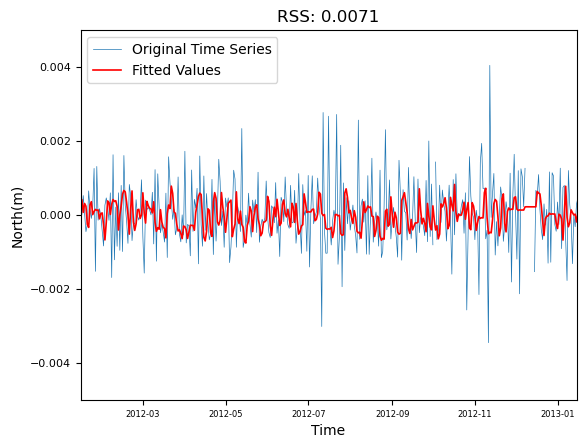

In [117]:
#model AR (Auto-Regressive) -> Plot PACF (p = 1)
modelN_AR = ARIMA(tsLogDiffN_noOut, order=(1, 1, 0))  
resultsN_AR = modelN_AR.fit()
plt.plot(tsLogDiffN_df, label='Original Time Series', linewidth = 0.5)
plt.plot(resultsN_AR.fittedvalues, color='red', label='Fitted Values', linewidth= 1.2)

# Calculate Residual Sum of Squares (RSS)
residuals_AR = resultsN_AR.fittedvalues - tsLogDiffN_df['north(m)']
rss_AR = np.sum(residuals_AR**2, axis=0)

#Ensure rss is a scalar (float)
#rss_scalar = float(rss.iloc[0]) 

# Show the plot
plt.title(f'RSS: {rss_AR:.4f}')
plt.legend()
plt.xlabel('Time')
plt.xticks(fontsize=6)
plt.xlim(pd.Timestamp('2012-01-15'), pd.Timestamp('2013-01-15'))
plt.ylabel('North(m)')
plt.ylim(-0.005,0.005)
plt.yticks(fontsize=8)
plt.show()

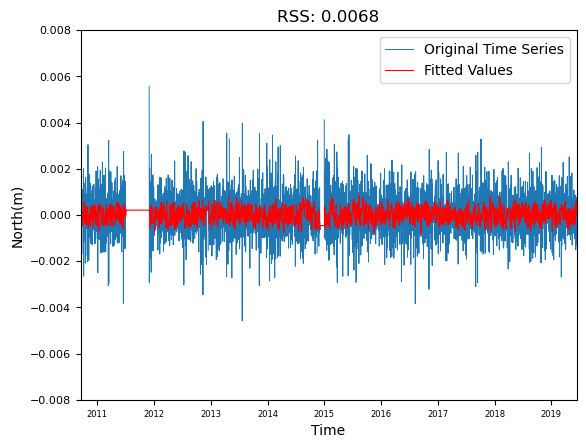

In [107]:
#model MA (Moving Averages) -> Plot ACF (q = 1)
model_MA = ARIMA(tsLogDiffN_noOut, order=(0, 1, 1))  
results_MA = model_MA.fit()  
plt.plot(tsLogDiffN_df, label='Original Time Series', linewidth = 0.7)
plt.plot(results_MA.fittedvalues, color='red', label='Fitted Values', linewidth= 0.8)

# Calculate Residual Sum of Squares (RSS)
residuals_MA = results_MA.fittedvalues - tsLogDiffN_df['north(m)']
rss_MA = np.sum(residuals_MA**2, axis=0)


plt.title(f'RSS: {rss_MA:.4f}')
plt.legend()
plt.xlabel('Time')
plt.xticks(fontsize=6)
plt.xlim(pd.Timestamp('2010-09-15'), pd.Timestamp('2019-06-13'))
plt.ylabel('North(m)')
plt.ylim(-0.008,0.008)
plt.yticks(fontsize=8)
plt.show()

/Users/rafaelaoliveira/anaconda3/lib/python3.11/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


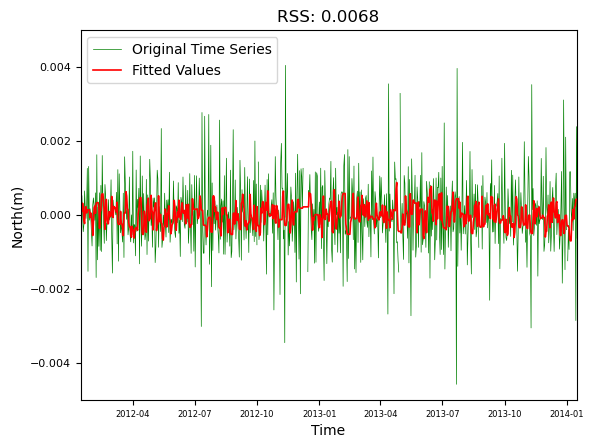

In [123]:
#combined - model ARIMA  p = 1 and q = 1:
#Auto-Regressive Integrated Moving Averages
model_ARIMA = ARIMA(tsLogDiffN_noOut, order=(1, 1, 1))  
results_ARIMA = model_ARIMA.fit()  
plt.plot(tsLogDiffN_df, color='green', label='Original Time Series', linewidth = 0.5)
plt.plot(results_ARIMA.fittedvalues,color='red', label='Fitted Values', linewidth= 1.2)

# Calculate Residual Sum of Squares (RSS)
residuals_ARIMA = results_ARIMA.fittedvalues - tsLogDiffN_df['north(m)']
rss_ARIMA = np.sum(residuals_ARIMA**2, axis=0)


plt.title(f'RSS: {rss_ARIMA:.4f}')
plt.legend()
plt.xlabel('Time')
plt.xticks(fontsize=6)
plt.xlim(pd.Timestamp('2012-01-15'), pd.Timestamp('2014-01-15'))
plt.ylabel('North(m)')
plt.ylim(-0.005,0.005)
plt.yticks(fontsize=8)
plt.show()

#ARIMA for outlier replaced
model_ARIMA_outDel = ARIMA(tsLogDiffN_noOut2, order=(1, 0, 1))
results_ARIMA_outDel = model_ARIMA_outDel.fit() 

#Plot rep: 
plt.subplot(121) 
plt.plot(tsLogDiffN_df, label='Original Time Series', linewidth = 0.4)
plt.plot(results_ARIMA.fittedvalues, color='red', label='Fitted Values', linewidth= 0.8)
plt.xlim(pd.Timestamp('2010-09-15'), pd.Timestamp('2011-03-15'))
plt.title('Outliers Replaced')

#Plot del: 
plt.subplot(122)
plt.plot(tsLogDiffN_df, label='Original Time Series', linewidth = 0.4)
plt.plot(results_ARIMA_outDel.fittedvalues, color='red', label='Fitted Values', linewidth= 0.8)
plt.xlim(pd.Timestamp('2010-09-15'), pd.Timestamp('2020-06-13'))
plt.title('Outliers Removed')
plt.tight_layout()

In [132]:
model_ARIMA2 = ARIMA(tsLogDiffN_noOut, order=(2, 1, 1)) 
results_ARIMA2 = model_ARIMA2.fit()  
model2 = results_ARIMA2.fittedvalues


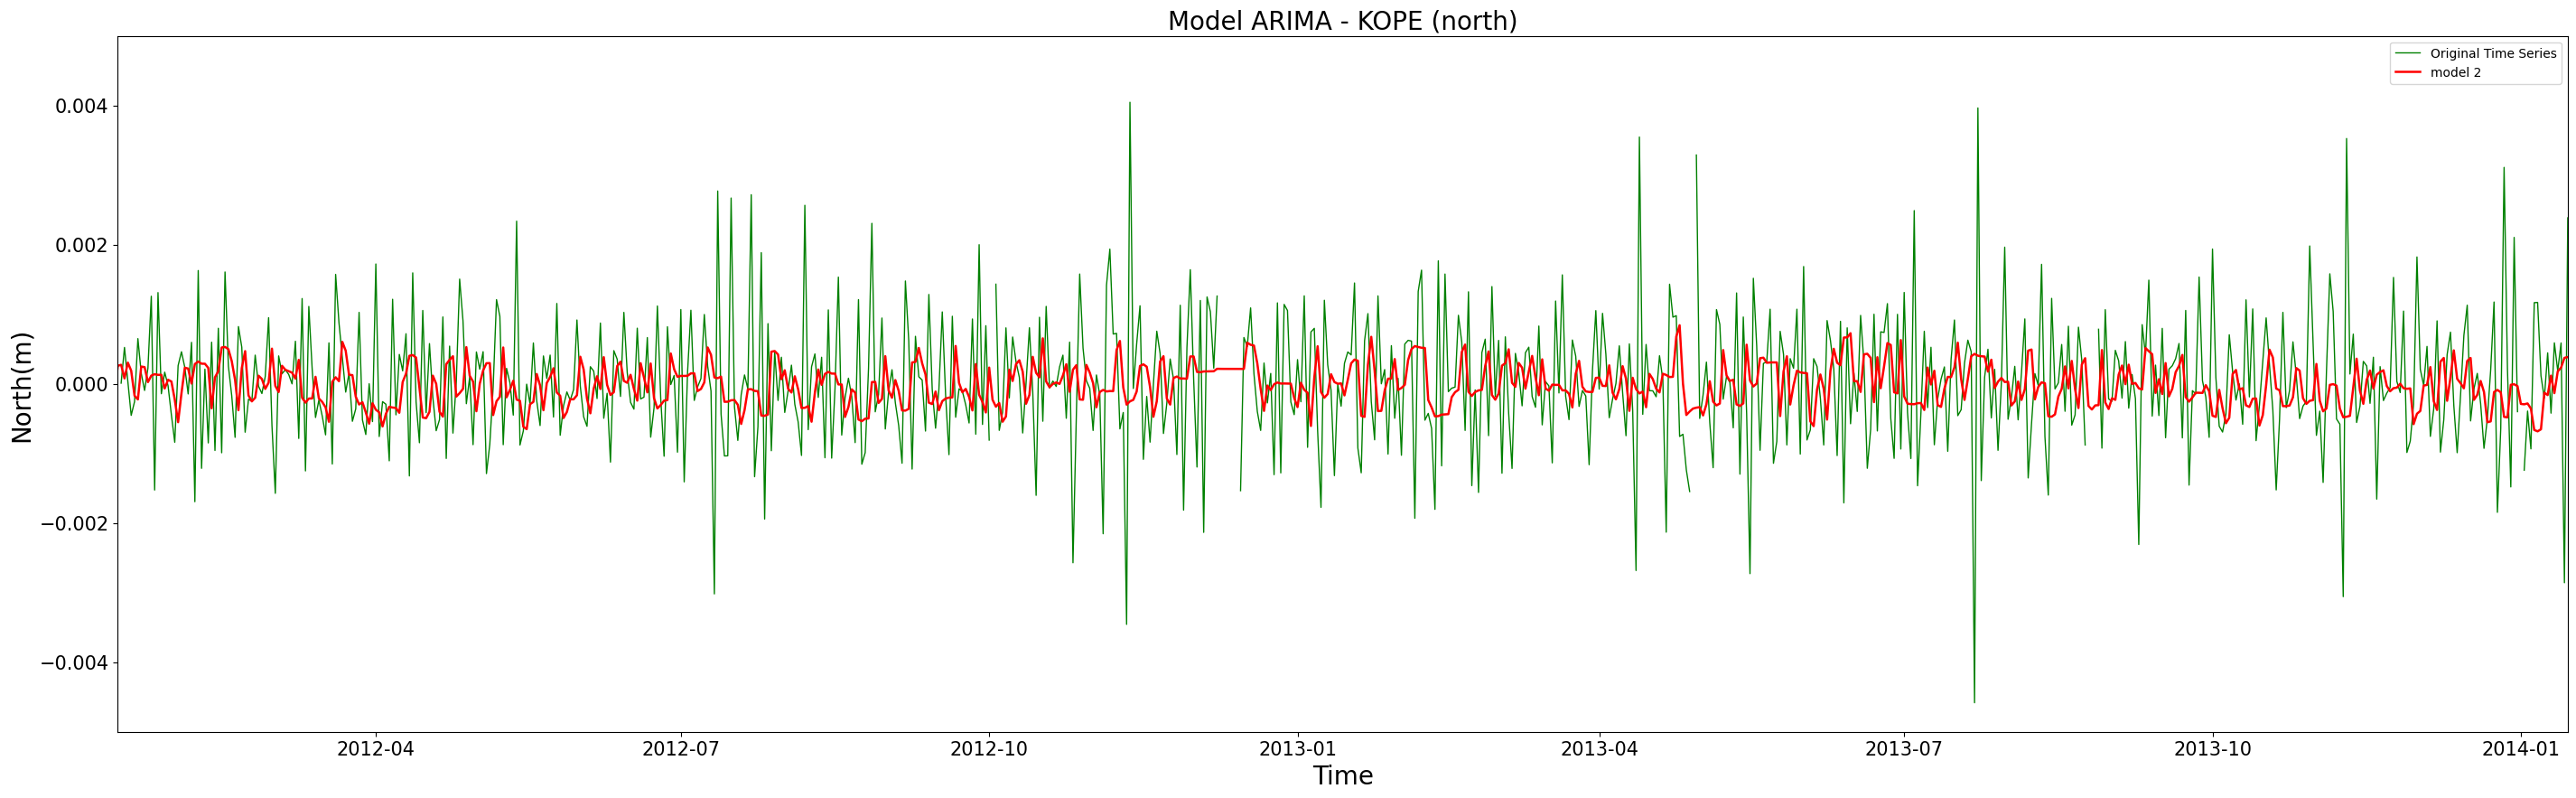

In [149]:
fig=plt.figure(figsize=(35,10))
plt.plot(tsLogDiffN_df, color='green', label='Original Time Series', linewidth = 1.)
plt.plot(model2, color='red', label='model 2', linewidth = 1.8)
#plt.plot(results_ARIMA.fittedvalues,color='red', label='model 1', linewidth= 1.2)

plt.title('Model ARIMA - KOPE (north)', fontsize=20)
plt.legend()
plt.xlabel('Time', fontsize=20)
plt.xticks(fontsize=15)
plt.xlim(pd.Timestamp('2012-01-15'), pd.Timestamp('2014-01-15'))
plt.ylabel('North(m)', fontsize=20)
plt.ylim(-0.005,0.005)
plt.yticks(fontsize=15)
plt.legend(loc='best') 

fl = 'kope_north.svg'
f = io.BytesIO()
plt.savefig(fl, format="svg")

plt.show()